In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r drive/My\ Drive/COLAB/data/test/ .

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
list_ds = tf.data.Dataset.list_files("test/*.jpg")

def get_tensor_label(label_path):
    arq = open(label_path.numpy(), "r")
    objects = []
    while(1):
        prov = arq.readline().replace("\n", "")
        if prov == "": break 
        c, x, y, w, h = prov.split(" ")
        objects.append([int(c), float(x), float(y), float(w), float(h)])
    return tf.cast(tf.stack(objects), tf.float32)
        
def get_label(image_path):
    dir_path, label_path = tf.strings.split(image_path, "/")
    label_path = tf.strings.split(label_path, ".")[0] 
    label_path = dir_path + "/" + label_path + ".txt"
    return get_tensor_label(label_path)

WIDTH, HEIGHT = 608, 608

def load_image(image_path):
    img = tf.image.decode_jpeg(image_path, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    return tf.image.resize(img, [WIDTH, HEIGHT])
    
# label is like [class, X, Y, W, H]
def process_path(image_path):
    label = get_label(image_path)
    image_path = tf.io.read_file(image_path)
    img = load_image(image_path)
    return img, label

[[0.       0.199609 0.610417 0.049219 0.0625  ]
 [0.       0.021094 0.693056 0.042188 0.05    ]]
image shape:  (608, 608, 3)


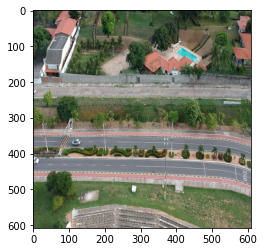

In [94]:
# checking...
for f in list_ds.take(1):
    img, label = process_path(f)
    plt.imshow(img.numpy())
    print(label.numpy())
    print("image shape: ", img.numpy().shape)